In [ ]:
#from compute_FIT_TE_DFI import compute_FIT_TE_DFI
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
w = 3
data = {}
data[f'{w}'] = {}

print(data)



{'3': {}}


idiota n: 0
carico i dati...
idiota n: 1
carico i dati...
idiota n: 2
carico i dati...
idiota n: 3
carico i dati...
idiota n: 4
carico i dati...
idiota n: 5
carico i dati...
idiota n: 6
carico i dati...
idiota n: 7
carico i dati...
idiota n: 8
carico i dati...
idiota n: 9
carico i dati...
idiota n: 10
carico i dati...
idiota n: 11
carico i dati...
idiota n: 12
carico i dati...
idiota n: 13
carico i dati...
idiota n: 14
carico i dati...
idiota n: 15
carico i dati...
idiota n: 16
carico i dati...
idiota n: 17
carico i dati...
idiota n: 18
carico i dati...
idiota n: 19
carico i dati...
idiota n: 20
carico i dati...
idiota n: 21
carico i dati...
idiota n: 22
carico i dati...
idiota n: 23
carico i dati...
idiota n: 24
carico i dati...
idiota n: 25
carico i dati...
idiota n: 26
carico i dati...
idiota n: 27
carico i dati...
idiota n: 28
carico i dati...
idiota n: 29
carico i dati...
idiota n: 30
carico i dati...
idiota n: 31
carico i dati...
idiota n: 32
carico i dati...
idiota n: 33
carico 

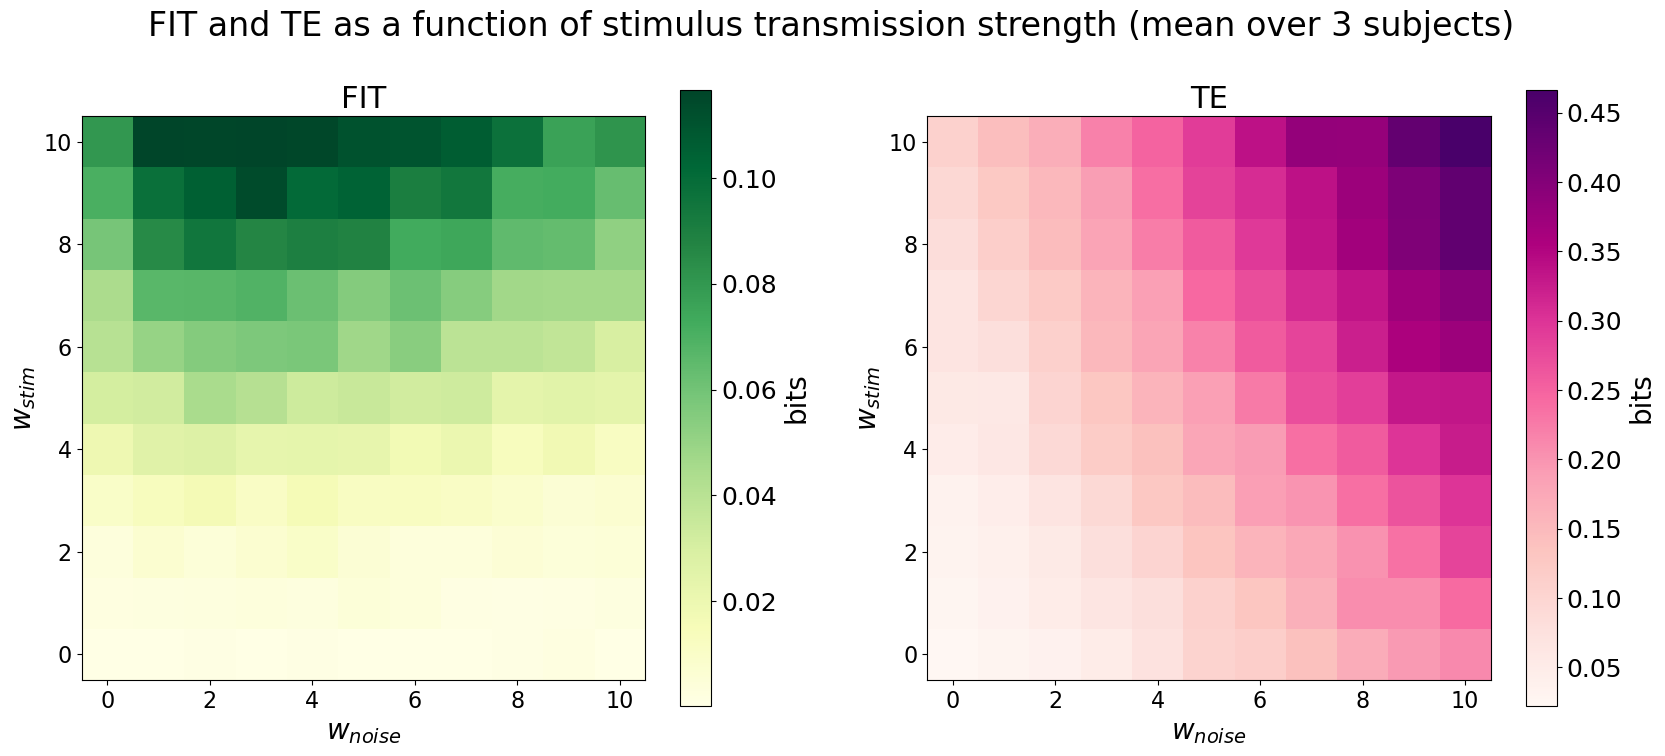

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Numero di soggetti da considerare
n_subjects = 5
n_weights = 11 * 11 
n_bins = 5

# Array per contenere i valori per ogni soggetto e ogni combinazione di pesi
all_fit = np.zeros((n_subjects, n_weights))
all_te = np.zeros((n_subjects, n_weights))

# Ciclo su ciascun soggetto
for subject_index in range(n_subjects):
    subject_dir = os.path.join("Simulations", f"subject{subject_index:02d}")

    for weight_index in range(n_weights):
        print(f'idiota n: {weight_index}')
        filename = f"weight{weight_index:02d}.csv"
        filepath = os.path.join(subject_dir, filename)
        if not os.path.exists(filepath):
            continue  
        df = pd.read_csv(filepath, sep=';')
        
        print('carico i dati...')

        S = df['S'].to_numpy()
        x_noise_t = df['x_noise_t'].to_numpy()
        x_signal_t = df['x_signal_t'].to_numpy()
        X = x_noise_t + x_signal_t
        Y_t = df['Y_t'].to_numpy()
        Y_del = df['Y_tdel'].to_numpy()

        _, bin_edges = pd.cut(x_noise_t, n_bins, retbins=True)
        bX_noise = np.digitize(x_noise_t, bins=bin_edges, right=True)

        _, bin_edges = pd.cut(x_signal_t, n_bins, retbins=True)
        bX_sig = np.digitize(x_signal_t, bins=bin_edges, right=True)

        _, bin_edges = pd.cut(Y_del, n_bins, retbins=True)
        bY_del = np.digitize(Y_del, bins=bin_edges, right=True)

        _, bin_edges = pd.cut(Y_t, n_bins, retbins=True)
        bY = np.digitize(Y_t, bins=bin_edges, right=True)


        #bX = (bX_sig - 1) * n_bins + bX_noise
        _, bin_edges = pd.cut(X, n_bins, retbins=True)
        bX = np.digitize(X, bins=bin_edges, right=True)
        
        # Calcola FIT, TE e DFI (in questo esempio utilizziamo solo FIT e TE)
        te, dfi, fit = compute_FIT_TE_DFI(S, bX, bY_del, bY)
        
        all_fit[subject_index, weight_index] = fit
        all_te[subject_index, weight_index] = te

# Calcola la media sui soggetti per ciascuna combinazione di pesi
fit_heatmap = np.mean(all_fit, axis=0).reshape(11, 11)
te_heatmap = np.mean(all_te, axis=0).reshape(11, 11)

# Creazione delle heatmap
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), squeeze=False)

fit_ax = ax[0][0]
te_ax = ax[0][1]

im_fit = fit_ax.imshow(fit_heatmap, origin='lower', cmap='YlGn')
im_te = te_ax.imshow(te_heatmap, origin='lower', cmap='RdPu')

fit_ax.set_title('FIT', fontsize=22)
te_ax.set_title('TE', fontsize=22)

cbar_fit = fit_ax.figure.colorbar(im_fit, ax=fit_ax)
cbar_te = te_ax.figure.colorbar(im_te, ax=te_ax)

cbar_fit.set_label(label='bits', fontsize=20)
cbar_fit.ax.tick_params(labelsize=18)

cbar_te.set_label(label='bits', fontsize=20)
cbar_te.ax.tick_params(labelsize=18)

fit_ax.set_xlabel("$w_{noise}$", fontsize=20)
fit_ax.set_ylabel("$w_{stim}$", fontsize=20)

te_ax.set_xlabel("$w_{noise}$", fontsize=20)
te_ax.set_ylabel("$w_{stim}$", fontsize=20)

fit_ax.tick_params(axis='both', which='major', labelsize=16)
te_ax.tick_params(axis='both', which='major', labelsize=16)

plt.suptitle("FIT and TE as a function of stimulus transmission strength (mean over 3 subjects)", fontsize=24)
plt.show()


In [5]:
fit_heatmap = np.zeros(10*10)
te_heatmap = np.zeros(10*10)

subject_dir = os.path.join("Simulations", "subject00")

# Ciclo sui 100 file (weight index da 00 a 99)
for weight_index in range(10*10):
    filename = f"weight{weight_index:02d}.csv"
    filepath = os.path.join(subject_dir, filename)

    df = pd.read_csv(filepath, sep=';')
    
    S = df['S'].to_numpy()
    bX = df['bX_signal'].to_numpy()
    bYt = df['bYt'].to_numpy()
    bYpast = df['bYpast'].to_numpy()
    
    # Calcola FIT, TE e DFI (questo esempio usa solo FIT e TE per la heatmap)
    te, dfi, fit = compute_FIT_TE_DFI(S, bX, bYt, bYpast)
    fit_heatmap[weight_index] = fit
    te_heatmap[weight_index] = te

fit_heatmap = fit_heatmap.reshape(10,10)    
te_heatmap = te_heatmap.reshape(10,10)    

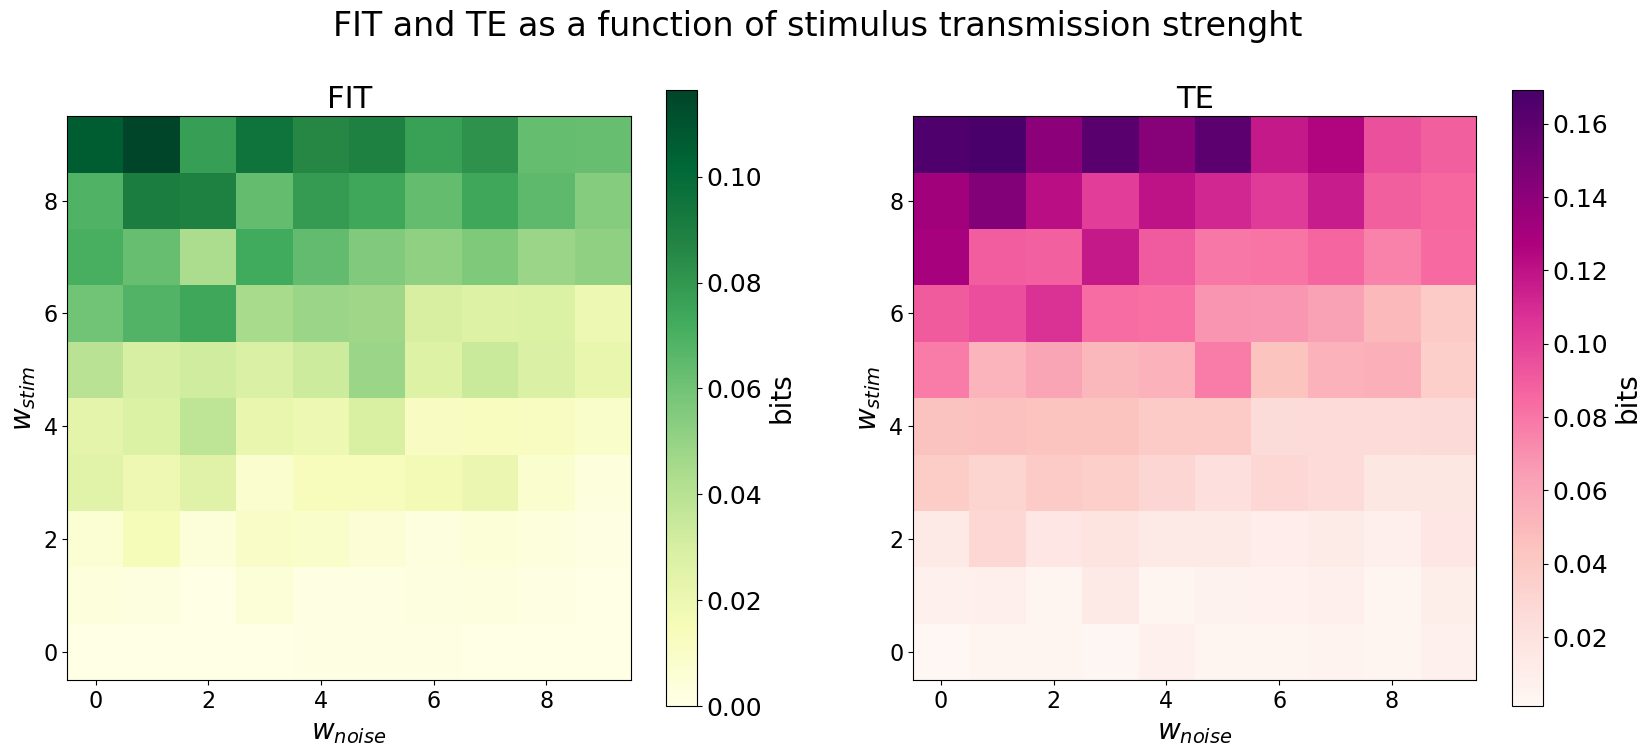

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8), squeeze = False)


fit_ax = ax[0][0]
te_ax = ax[0][1]

im_fit = fit_ax.imshow(fit_heatmap, origin='lower', cmap='YlGn')
im_te = te_ax.imshow(te_heatmap, origin='lower', cmap='RdPu')

fit_ax.set_title('FIT', fontsize=22)
te_ax.set_title('TE', fontsize=22)

cbar_te = te_ax.figure.colorbar(im_te, ax = te_ax)
cbar_fit = te_ax.figure.colorbar(im_fit, ax = fit_ax)

cbar_fit.set_label(label='bits', fontsize=20)
cbar_fit.ax.tick_params(labelsize = 18)

cbar_te.set_label(label='bits', fontsize=20)
cbar_te.ax.tick_params(labelsize = 18)

fit_ax.set_xlabel("$w_{noise}$", fontsize=20)
fit_ax.set_ylabel("$w_{stim}$", fontsize=20)

te_ax.set_xlabel("$w_{noise}$", fontsize=20)
te_ax.set_ylabel("$w_{stim}$", fontsize=20)

fit_ax.tick_params(axis='both', which='major', labelsize=16)
te_ax.tick_params(axis='both', which='major', labelsize=16)

te_ax.set_xlabel("$w_{noise}$")
te_ax.set_ylabel("$w_{stim}$")

plt.suptitle("FIT and TE as a function of stimulus transmission strenght", fontsize = 24)
plt.show()